In [14]:
words = open('french-first-names.txt', 'r').read().splitlines()


In [15]:
words[:10]


['01_prenom',
 'aaliyah',
 'aapeli',
 'aapo',
 'aaren',
 'aarne',
 'aarón',
 'aaron',
 'aatami',
 'aatto']

In [16]:
words.pop(0)

'01_prenom'

In [20]:
len(words)

11627

In [23]:
min(len(w) for w in words )

2

In [25]:
max(len(w) for w in words )

15

In [125]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
vocab_size = len(itos)
print(itos)
print(vocab_size)

{1: ' ', 2: "'", 3: '-', 4: 'a', 5: 'b', 6: 'c', 7: 'd', 8: 'e', 9: 'f', 10: 'g', 11: 'h', 12: 'i', 13: 'j', 14: 'k', 15: 'l', 16: 'm', 17: 'n', 18: 'o', 19: 'p', 20: 'q', 21: 'r', 22: 's', 23: 't', 24: 'u', 25: 'v', 26: 'w', 27: 'x', 28: 'y', 29: 'z', 30: 'à', 31: 'á', 32: 'ã', 33: 'ä', 34: 'å', 35: 'æ', 36: 'ç', 37: 'è', 38: 'é', 39: 'ê', 40: 'ë', 41: 'ì', 42: 'í', 43: 'ï', 44: 'ð', 45: 'ñ', 46: 'ò', 47: 'ó', 48: 'ô', 49: 'õ', 50: 'ö', 51: 'ø', 52: 'ù', 53: 'ú', 54: 'ü', 55: 'þ', 0: '.'}
56


In [26]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [27]:
sorted(b.items(), key = lambda kv: -kv[1])
#(('a', 'r'), 1151), (('r', 'i'), 1007)

[(('a', '<E>'), 2718),
 (('e', '<E>'), 1592),
 (('a', 'n'), 1576),
 (('n', '<E>'), 1398),
 (('a', 'r'), 1151),
 (('<S>', 'a'), 1050),
 (('r', 'i'), 1007),
 (('i', 'n'), 988),
 (('e', 'l'), 975),
 (('e', 'r'), 965),
 (('n', 'a'), 954),
 (('<S>', 'm'), 928),
 (('r', 'a'), 870),
 (('l', 'a'), 852),
 (('<S>', 's'), 844),
 (('e', 'n'), 821),
 (('s', '<E>'), 816),
 (('a', 'l'), 764),
 (('m', 'a'), 754),
 (('o', '<E>'), 746),
 (('l', 'i'), 740),
 (('h', 'a'), 729),
 (('l', 'e'), 712),
 (('o', 'n'), 700),
 (('<S>', 'c'), 698),
 (('n', 'e'), 693),
 (('i', 'a'), 679),
 (('<S>', 'l'), 637),
 (('<S>', 'j'), 609),
 (('<S>', 'r'), 599),
 (('o', 'r'), 587),
 (('r', '<E>'), 576),
 (('i', 's'), 574),
 (('i', 'l'), 569),
 (('t', 'a'), 567),
 (('<S>', 'e'), 563),
 (('<S>', 'g'), 560),
 (('<S>', 'k'), 558),
 (('r', 'e'), 556),
 (('i', 'e'), 545),
 (('<S>', 'b'), 528),
 (('i', '<E>'), 524),
 (('<S>', 't'), 524),
 (('y', '<E>'), 523),
 (('l', '<E>'), 516),
 (('<S>', 'd'), 509),
 (('n', 'i'), 496),
 (('r', '

In [28]:
import torch


In [32]:
set(''.join(words))
#len 55

{' ',
 "'",
 '-',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'à',
 'á',
 'ã',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'é',
 'ê',
 'ë',
 'ì',
 'í',
 'ï',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 'ø',
 'ù',
 'ú',
 'ü',
 'þ'}

In [38]:
N = torch.zeros((56, 56), dtype=torch.int32)


In [39]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [40]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

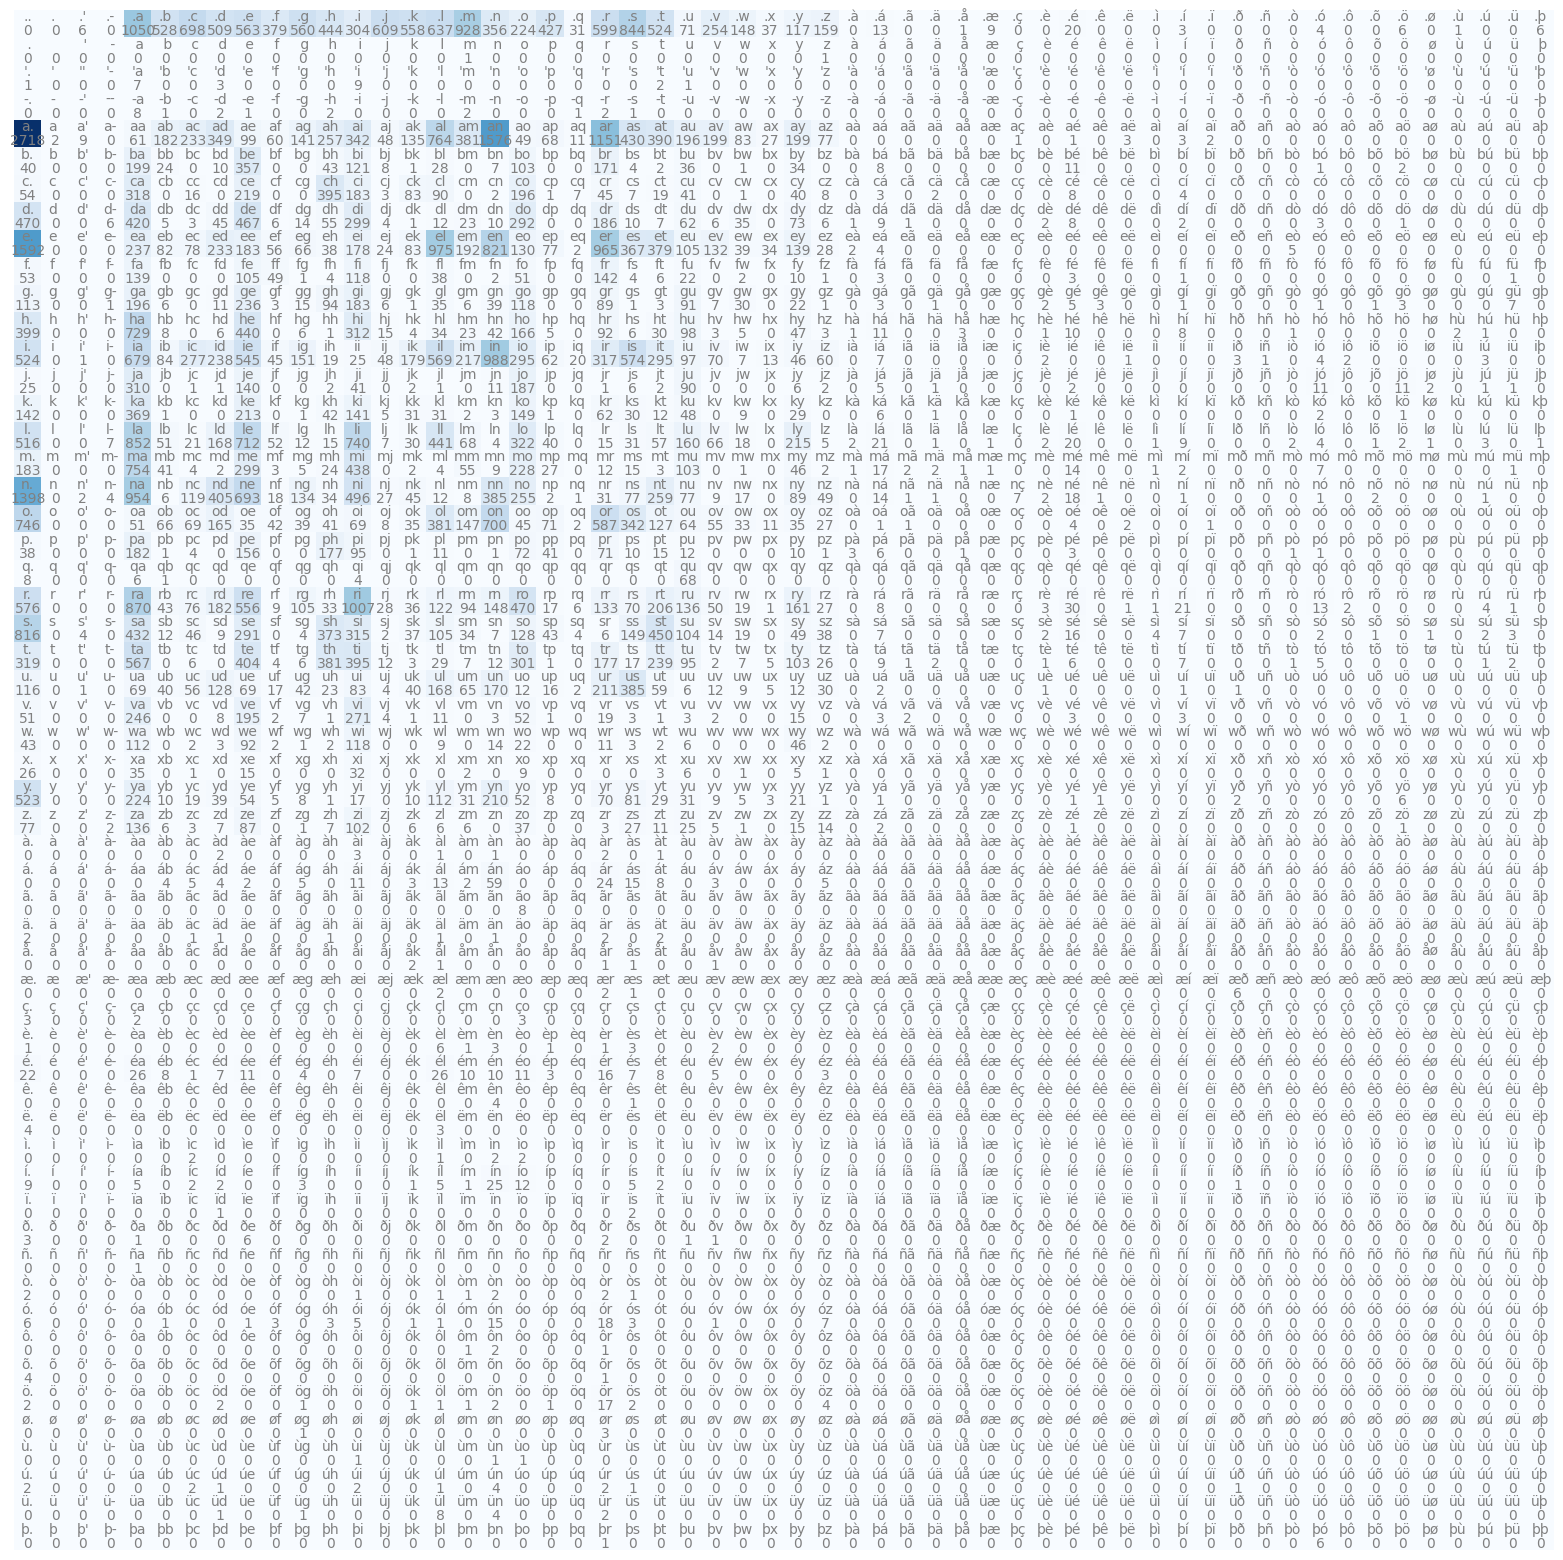

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,20))
plt.imshow(N, cmap='Blues')
for i in range(56):
    for j in range(56):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [43]:
N[0]


tensor([   0,    0,    6,    0, 1050,  528,  698,  509,  563,  379,  560,  444,
         304,  609,  558,  637,  928,  356,  224,  427,   31,  599,  844,  524,
          71,  254,  148,   37,  117,  159,    0,   13,    0,    0,    1,    9,
           0,    0,   20,    0,    0,    0,    3,    0,    0,    0,    0,    4,
           0,    0,    6,    0,    1,    0,    0,    6], dtype=torch.int32)

In [44]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000e+00, 0.0000e+00, 5.1604e-04, 0.0000e+00, 9.0307e-02, 4.5412e-02,
        6.0033e-02, 4.3777e-02, 4.8422e-02, 3.2597e-02, 4.8164e-02, 3.8187e-02,
        2.6146e-02, 5.2378e-02, 4.7992e-02, 5.4786e-02, 7.9814e-02, 3.0618e-02,
        1.9266e-02, 3.6725e-02, 2.6662e-03, 5.1518e-02, 7.2590e-02, 4.5068e-02,
        6.1065e-03, 2.1846e-02, 1.2729e-02, 3.1822e-03, 1.0063e-02, 1.3675e-02,
        0.0000e+00, 1.1181e-03, 0.0000e+00, 0.0000e+00, 8.6007e-05, 7.7406e-04,
        0.0000e+00, 0.0000e+00, 1.7201e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.5802e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.4403e-04,
        0.0000e+00, 0.0000e+00, 5.1604e-04, 0.0000e+00, 8.6007e-05, 0.0000e+00,
        0.0000e+00, 5.1604e-04])

In [45]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'g'

In [46]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [47]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)


tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [48]:
p.shape

torch.Size([3])

In [51]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [52]:
P.sum(1, keepdim=True).shape


torch.Size([56, 1])

In [54]:
P.sum(1).shape


torch.Size([56])

In [55]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

grthasa.
mernawer.
rchotia.
ka.
ar.


In [ ]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [56]:
log_likelihood = 0.0
n = 0

for w in words:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-216848.1562)
nll=tensor(216848.1562)
2.5877177715301514


In [108]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. a
a a
a l
l i
i y
y a
a h
h .


In [109]:
xs

tensor([ 0,  4,  4, 15, 12, 28,  4, 11])

In [110]:
ys

tensor([ 4,  4, 15, 12, 28,  4, 11,  0])

In [111]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=56).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [112]:
xenc.shape


torch.Size([8, 56])

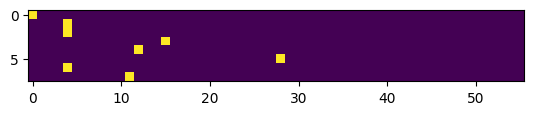

In [63]:
plt.imshow(xenc)


In [113]:
xenc.dtype

torch.float32

In [121]:
W = torch.randn((56, 56))
xenc @ W

tensor([[ 0.2490,  0.5255, -0.3233,  0.8656, -0.7707,  0.5960,  0.5852,  0.8319,
         -1.3314, -0.4890,  1.7503,  0.1806, -0.6637,  0.4534, -1.2340,  0.5171,
          1.4508, -0.8581,  0.4731,  1.1610, -0.4892, -0.7429, -1.7757,  1.4408,
          1.4074, -1.5679,  0.1708, -0.2654,  1.1775, -2.1397,  1.2018, -0.2208,
         -1.4734,  0.4572, -2.4441,  0.1748,  1.5437,  1.7977, -0.2767, -0.0101,
         -0.4829, -0.1842,  0.3829, -0.3269,  2.1418, -0.5274, -0.0977, -0.5326,
          0.1113, -0.1046,  0.0546,  0.2107, -0.6814, -2.5613,  0.0907, -2.1153],
        [-0.7779,  0.0027,  0.4186, -0.0699, -0.4952, -0.5234, -0.1338, -1.0040,
         -0.2221,  0.6729,  0.2332,  0.0310,  0.0041,  1.0839,  0.4186, -0.2177,
         -2.6707, -1.0188, -1.3017, -1.0236,  0.2748,  0.4081, -0.1408,  0.2794,
          1.4483,  0.4193,  1.5886,  1.8494, -0.3744,  0.1450, -0.9447, -0.8271,
         -1.1219,  0.7627, -0.5194, -0.7403, -1.1119,  0.3089,  1.3335, -0.7290,
          0.3001,  1.0325, 

In [122]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0144, 0.0190, 0.0081, 0.0267, 0.0052, 0.0204, 0.0202, 0.0258, 0.0030,
         0.0069, 0.0647, 0.0135, 0.0058, 0.0177, 0.0033, 0.0189, 0.0480, 0.0048,
         0.0180, 0.0359, 0.0069, 0.0053, 0.0019, 0.0475, 0.0459, 0.0023, 0.0133,
         0.0086, 0.0365, 0.0013, 0.0374, 0.0090, 0.0026, 0.0178, 0.0010, 0.0134,
         0.0526, 0.0679, 0.0085, 0.0111, 0.0069, 0.0094, 0.0165, 0.0081, 0.0957,
         0.0066, 0.0102, 0.0066, 0.0126, 0.0101, 0.0119, 0.0139, 0.0057, 0.0009,
         0.0123, 0.0014],
        [0.0052, 0.0114, 0.0172, 0.0106, 0.0069, 0.0067, 0.0099, 0.0041, 0.0091,
         0.0222, 0.0143, 0.0117, 0.0114, 0.0335, 0.0172, 0.0091, 0.0008, 0.0041,
         0.0031, 0.0041, 0.0149, 0.0170, 0.0098, 0.0150, 0.0482, 0.0172, 0.0555,
         0.0720, 0.0078, 0.0131, 0.0044, 0.0050, 0.0037, 0.0243, 0.0067, 0.0054,
         0.0037, 0.0154, 0.0430, 0.0055, 0.0153, 0.0318, 0.0067, 0.0326, 0.0064,
         0.0138, 0.0224, 0.1032, 0.0158, 0.0383, 0.0183, 0.0245, 0.0577, 0.0033,
  

In [123]:
probs[0]


tensor([0.0144, 0.0190, 0.0081, 0.0267, 0.0052, 0.0204, 0.0202, 0.0258, 0.0030,
        0.0069, 0.0647, 0.0135, 0.0058, 0.0177, 0.0033, 0.0189, 0.0480, 0.0048,
        0.0180, 0.0359, 0.0069, 0.0053, 0.0019, 0.0475, 0.0459, 0.0023, 0.0133,
        0.0086, 0.0365, 0.0013, 0.0374, 0.0090, 0.0026, 0.0178, 0.0010, 0.0134,
        0.0526, 0.0679, 0.0085, 0.0111, 0.0069, 0.0094, 0.0165, 0.0081, 0.0957,
        0.0066, 0.0102, 0.0066, 0.0126, 0.0101, 0.0119, 0.0139, 0.0057, 0.0009,
        0.0123, 0.0014])

In [124]:
probs[0].shape


torch.Size([56])

In [75]:
# randomly initialize 27 neurons' weights. each neuron receives 56 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((56, 56), generator=g)

In [77]:
xenc = F.one_hot(xs, num_classes=56).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [78]:
probs.shape


torch.Size([8, 56])

In [79]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .a (indexes 0,4)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0418, 0.0069, 0.0085, 0.0029, 0.0116, 0.0085, 0.0019, 0.0160, 0.0094,
        0.0215, 0.0054, 0.0191, 0.0063, 0.0057, 0.0344, 0.1638, 0.0416, 0.0017,
        0.0172, 0.0038, 0.0233, 0.0075, 0.0020, 0.0136, 0.0081, 0.1059, 0.1005,
        0.0045, 0.0026, 0.0118, 0.0030, 0.0180, 0.0092, 0.0323, 0.0039, 0.0037,
        0.0014, 0.0305, 0.0026, 0.0294, 0.0033, 0.0069, 0.0062, 0.0122, 0.0023,
        0.0268, 0.0158, 0.0138, 0.0092, 0.0015, 0.0098, 0.0195, 0.0150, 0.0027,
        0.0101, 0.0032])
label (actual next character): 4
probability assigned by the net to the the correct character: 0.011603203602135181
log likelihood: -4.456474304199219
negative log likelihood: 4.456474304199219
--------
bigram example 2: aa (indexes 4,4)
input to the neural net: 4
output probabilities from the neural net: tensor([0.0065, 0.0090, 0.0038, 0.0443, 0.0024, 0.0082, 0.0046, 0.0115, 0.0

In [81]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((56, 56), generator=g, requires_grad=True)

number of examples:  83799


In [94]:
# gradient descent
for k in range(100):

  # forward pass
  xenc = F.one_hot(xs, num_classes=56).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())

  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()

  # update
  W.data += -50 * W.grad

2.924666404724121
2.9091498851776123
2.894984722137451
2.882004499435425
2.870072364807129
2.859074115753174
2.8489131927490234
2.839505672454834
2.830778121948242
2.8226664066314697
2.8151111602783203
2.8080601692199707
2.8014678955078125
2.79529070854187
2.789492130279541
2.784036874771118
2.7788949012756348
2.7740392684936523
2.7694456577301025
2.765091896057129
2.7609591484069824
2.7570297718048096
2.753288507461548
2.749721050262451
2.7463154792785645
2.7430596351623535
2.7399444580078125
2.736959934234619
2.734098196029663
2.731351137161255
2.728712320327759
2.726175308227539
2.7237343788146973
2.721383810043335
2.719119071960449
2.7169361114501953
2.714829444885254
2.712796449661255
2.7108330726623535
2.708935499191284
2.707101345062256
2.7053277492523193
2.7036116123199463
2.7019505500793457
2.70034122467041
2.6987831592559814
2.697273015975952
2.6958088874816895
2.6943891048431396
2.693011999130249
2.6916751861572266
2.690377950668335
2.689117670059204
2.687894105911255
2.6867

In [95]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

  out = []
  ix = 0
  while True:

    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=56).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

grthasa.
merna.
er.
rchotia.
ka.
